# Classification Evaluation Metrics

### Evaluation metrics are used to measure the quality of the model. One of the most important topics in machine learning is how to evaluate your model. When you build your model, it is very crucial to measure how accurately it predicts your expected outcome.

### We have different evaluation metrics for a different set of machine learning algorithms. For evaluating classification models, we use classification metrics and for evaluating regression models, we use regression metrics. Here, I’ll talk about only classification metrics.

## Let's make a classification model quickly

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df['Gender'] = df['Gender'].map({'Male':1 , 'Female':0})

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [6]:
X = df.iloc[:,1:-1]
Y = df.iloc[:,-1]

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
col = ['Age','EstimatedSalary']
X[col] = sc.fit_transform(X[col])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.25,random_state=5)

In [10]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(train_x,train_y)

LogisticRegression()

In [11]:
print('The training score : ',logr.score(train_x,train_y))
print('The testing score : ',logr.score(test_x,test_y))

The training score :  0.85
The testing score :  0.86


In [12]:
test_y_pred = logr.predict(test_x)
train_y_pred = logr.predict(train_x)

## classification Evaluation Metrics :
   ### - Logarithmic Loss or Log Loss
   ### - Accuracy
   ### - Precision 
   ### - Recall 
   ### - F1_score 
   ### - Jaccard score

### Logarithmic Loss or Log Loss:

Log Loss can be used when the output of the classifier is a numeric probability instead of a class label. Log loss measures the unpredictability of the extra noise that comes from using a predictor as opposed to the true labels. It is also known as 'Cross-entropy loss'


Log loss doesn’t have an upper bound and it exists on the range [0, ∞).<br> Minimizing log loss gives greater accuracy for the classifier.<br>
Here, we have a scikit-learn implementation of Log Loss:

In [13]:
from sklearn.metrics import log_loss
print('The log loss is : ',log_loss(test_y,test_y_pred))

The log loss is :  4.835468675159006


### Confusion Matrix:

A confusion matrix or error matrix is a table that shows the number of correct and incorrect predictions made by the model compared with the actual classifications in the test set or what type of errors are being made.<br>This matrix describes the performance of a classification model on test data for which true values are known.<br> It is a n*n matrix, where n is the number of classes.<br>This matrix can be generated after making predictions on the test data.

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y,test_y_pred)
cm

array([[61,  5],
       [ 9, 25]], dtype=int64)

In [15]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,                                    # A method for plotting the confusion matrix
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


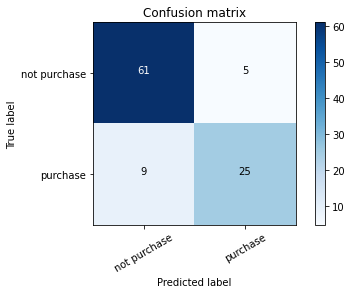

In [16]:
plot_confusion_matrix(cm,['not purchase','purchase']) # need to provide the classes

Four possible outcomes could occur while performing classification predictions:<br>


**True Positives (TP):** Number of outcomes that are actually positive and are predicted positive.<br>
**True Negatives (TN):** Number of outcomes that are actually negative and are predicted negative.<br>
**False Positives (FP):** Number of outcomes that are actually negative but predicted positive. These errors are also called Type 1 Errors.<br>
**False Negatives (FN):** Number of outcomes that are actually positive but predicted negative. These errors are also called Type 2 Errors.<br>

    
   ###### Positive and Negatives refers to the prediction itself. True and False refers to the correctness of the prediction.

We can get 4 classification metrics from the Confusion Matrix:<BR>
 ### 1.) Accuracy:<BR>
     
    It can also be calculated in terms of positives and negatives for binary classification:
                           
                            Accuracy = (TP+TN) / (TP+FP+TN+FN)

    It doesn’t grant us much information regarding the distribution of false positives and false negatives.

In [17]:
from sklearn.metrics import accuracy_score
print('The accuracy score : ',accuracy_score(test_y,test_y_pred))

The accuracy score :  0.86


### 2.) Precision or Positive Predictive Value (PPV):

    It is the ratio of True Positives to all the positives predicted by the model. It is useful for the skewed and unbalanced dataset. 
    
                             PPV = TP / (TP+FP)
    
    The more False positives the model predicts, the lower the precision.


In [18]:
from sklearn.metrics import precision_score
print('The precision score : ',precision_score(test_y,test_y_pred))

The precision score :  0.8333333333333334


### 3.) Recall or Sensitivity or True Positive Rate(TPR):
     
    It is the ratio of true positives to all the positives in your dataset. It measures the model’s ability to detect positive samples. 
    
                          TPR = TP / (TP+FN)
    
    The more false negatives the model predicts, the lower the recall.

In [19]:
from sklearn.metrics import recall_score
print('The recall score : ',recall_score(test_y,test_y_pred))

The recall score :  0.7352941176470589


### 4.) F1-score or F-measure:
    
    It is a single metric that combines both Precision and Recall.<br>
    The higher the F1 score, the better is the performance of our model. The range for F1-score is [0,1].
    
                      f1_score = (2*precision*recall) / (precision + recall)
    
    F1 score is the weighted average of precision and recall. The classifier will only get a high F-score if both precision and recall are high. This metric only favors classifiers that have similar precision and recall.

Here’s a scikit-learn implementation of the F1-score:

In [20]:
from sklearn.metrics import f1_score
print('The f1 score : ',f1_score(test_y,test_y_pred))

The f1 score :  0.78125


### Jaccard Score :

    Jaccard score is defined as the ratio of the size of the intersection to the size of the union of label classes between predicted labels and ground truth labels.
    
    It is considered a similarity coefficient to compare the predicted classes and true classes. 
    
    The value of 1 denotes the best classification and 0 denotes the worst. 
    
    Jaccard loss is considered a poor choice if the class distribution is imbalanced.

In [21]:
from sklearn.metrics import jaccard_score
print('The jaccard score : ',jaccard_score(test_y,test_y_pred))

The jaccard score :  0.6410256410256411
